# CSCI-P556, Fall 2018
# Assignment 4

We will be using the the following data sets in this assignment:



*   [Ionosphere](https://archive.ics.uci.edu/ml/datasets/ionosphere)
*   [Car Evaluation](https://archive.ics.uci.edu/ml/datasets/car+evaluation)
*   [Credit Approval](https://archive.ics.uci.edu/ml/datasets/Credit+Approval)

Download them to the same folder as this .ipynb file. Take a look at the 'Data Set Descriptions' links in the above links.


## Problem 1: K-Fold Cross Validation [10 points]

Implement k- fold cross validation and select k = 5 to create 5 training and 5 test data sets from each data
set and save these 30 files. You will use these data sets for model comparison and parameter selection.

In [1]:
# Code for problem 1 goes here
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from collections import Counter
import math

In [2]:
#Reference1 - https://machinelearningmastery.com/implement-resampling-methods-scratch-python/
#Reference2- Discussed with classmates(Bhavna)

In [3]:
def fold_data_split(fold_data,filename):
    for i in range(len(fold_data)):
            fold_data1 = fold_data.copy()
            test_dataset = fold_data1.pop(i)
            train_dataset = pd.concat(fold_data1, ignore_index=True)                                             
            filename_train = filename+"_"+"train"+str(i+1)+".csv"
            filename_test = filename +"_"+"test"+str(i+1)+".csv"
            train_dataset.to_csv(filename_train, sep=',', encoding='utf-8', index = False)
            test_dataset.to_csv(filename_test, sep=',', encoding='utf-8', index = False)

Getting Inoshpere Data

In [218]:
#Reading Inosphere Data and diving into 5 folds.
inosphere_data = pd.read_table('ionosphere.data', header=None, sep=',')
inosphere_data.shape
length_dataframe=len(inosphere_data)
folds=[]
# index= np.arange(0, 351, 1)
# def dataset(dataset)
for i in range(4):
#     print(inosphere_data.shape)
    folds.append(inosphere_data.loc[np.random.choice(inosphere_data.index.values, int(length_dataframe/5),replace=False)])
    curr_index=folds[i].index
    remove_indexes=set(inosphere_data.index).difference(set(curr_index))
    inosphere_data=inosphere_data.loc[list(remove_indexes)]

In [5]:
pd.DataFrame(folds[0])
folds.append(inosphere_data)

In [6]:
fold_data_split(folds,'ion')

In [7]:
# inosphere_data.loc[np.random.choice(np.arange(0,len(inosphere_data),1), int((len(inosphere_data)+1)/5))]

In [8]:
# np.random.choice(np.arange(0,len(inosphere_data),1), int(len(inosphere_data)/5))

Getting Credit Data

In [219]:
#Reading Credit Data
credit_data=pd.read_csv('crx.data', header=None)

credit_data = credit_data.replace('?',np.nan)
credit_data.dropna(inplace=True)
columns = credit_data.dtypes.pipe(lambda x: x[x == 'object']).index

for col in columns:
    credit_data[col] = pd.factorize(credit_data[col])[0]

# credit_data.shape
# credit_data

In [10]:
# credit_data.values

In [11]:
# credit_data1 = get_data(credit_data,list(range(len(credit_data.columns)-1)))
##Reference1 - https://machinelearningmastery.com/implement-resampling-methods-scratch-python/
#Reference2- Discussed with classmates(Bhavna)
dataset_list1 = credit_data.values.tolist()
cred_size = math.ceil(len(credit_data)/5)
cred_data = []
for i in range(5):
    cred_fold = []
    while len(cred_fold) < cred_size and len(dataset_list1)-1 >= 0 :
        index = random.randint(0,len(dataset_list1)-1)
        cred_fold.append(dataset_list1.pop(index))
    cred_data.append(pd.DataFrame(np.array(cred_fold)))

In [17]:
# credit_data.shape
# len(credit_dataset[4])
# cred_data[1]

In [13]:
fold_data_split(cred_data,'credit')

Getting Car Data

In [220]:
#Reading Car Data and splitting it.
car_data=pd.read_csv('car.data', header=None)
car_data = car_data.replace('?',np.nan)
car_data.dropna(inplace=True)
columns = car_data.dtypes.pipe(lambda x: x[x == 'object']).index
for col in columns:
    car_data[col] = pd.factorize(car_data[col])[0]

In [168]:
# car_data

In [172]:
cardata_list = car_data.values.tolist()
car_data1 = []
car_size = math.ceil(len(car_data)/5)
for i in range(5):
    car_fold = []
    while len(car_fold) < car_size and len(cardata_list)-1 >= 0 :
        index = random.randint(0,len(cardata_list)-1)
        car_fold.append(cardata_list.pop(index))
    car_data1.append(pd.DataFrame(np.array(car_fold)))
# len(car_dataset[4])

In [173]:
fold_data_split(car_data1,'car')

## Problem 2: K-Nearest Neighbors (KNN) [30 points]

---



2.1 Implement KNN algorithm with two different distance functions. You can either use an existing distance
functions, i.e., Euclidean or design your own.

In [74]:
#Getting Train and test Data and labels
#Referenced from https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ and discussed with Agasthya Teja
def knn_data(training,test):
    train_data = training.iloc[:, :-1]
    train_labels = training.iloc[:,-1]
    actual_points = test.iloc[:,-1]
    pred_datapoints = test.iloc[:, :-1]
    pred_datapoints=np.array(pred_datapoints)
#     print(prediction_points)
#     print(train_data,train_labels,pred_datapoints,actual_points)
    return train_data,train_labels,pred_datapoints,actual_points


In [75]:
#Defining distance functions
def euclidean_distance(train_data,point,k):
    distance_euc = np.sqrt(np.sum((train_data - point)**2 , axis=1)) 
#     print(distance)
    return np.argsort(distance_euc)[0:k]

def manhattan_distance(train_data,point,k):
    distance_man = np.sum(abs(train_data - point) , axis=1)
#     print(distance)
    return np.argsort(distance_man)[0:k]

In [76]:
def knn_predict(train_data,train_labels,pred_datapoints,dist,k):   
    pred_labels = []
    for eachpoint in pred_datapoints:
        if dist=="Euclidean":
            distances=euclidean_distance(train_data,eachpoint,k)
        else:
            distances = manhattan_distance(train_data,eachpoint,k)   
            
        result_distances=[]
        for d in distances:
            result_distances.append(train_labels[d])
        label=Counter(result_distances).most_common(1)
        pred_labels.append(label[0][0]) 
    return pred_labels  

In [77]:
# X,y,prediction_points = knn_data(train_ion1,test_ion1)  
# knn_predict(prediction_points,"Euclidean",3)

In [78]:
def calculate_accuracy(pred_labels,actual_labels):
#     pred_labels=np.array(pred_labels)
#     print(pred_labels)
#     print(actual_labels)
    accuracy= np.sum(pred_labels == actual_labels)/len(actual_labels)
#     print(accuracy)
#     test_error = 1-accuracy
    return accuracy

2.2 Use the data sets obtained in problem 1 to determine the optimal k over each data set for KNN algorithm. For 5 different k values, plot the test error for each data set. Total number of figures = 3 (data set number) × 2 (distance function number) = 6. Report the best k and distance function for each data set.

In [99]:
#Reading ion data
train_ion1=pd.read_csv("ion_train1.csv")
test_ion1=pd.read_csv("ion_test1.csv")

train_ion2=pd.read_csv("ion_train2.csv")
test_ion2=pd.read_csv("ion_test2.csv")

train_ion3=pd.read_csv("ion_train3.csv")
test_ion3=pd.read_csv("ion_test3.csv")

train_ion4=pd.read_csv("ion_train4.csv")
test_ion4=pd.read_csv("ion_test4.csv")

train_ion5=pd.read_csv("ion_train5.csv")
test_ion5=pd.read_csv("ion_test5.csv")

In [151]:
def save_accuracy(train_dataset, test_dataset):
    train_data,train_labels,pred_datapoints,actual_points = knn_data(train_dataset,test_dataset)
#     print(train_data)
    dist_dict = {}
    k_values= [2,3,4,5,6,7,9,10,11,12,13]
    dist = ["Euclidean","Manhattan"]
    for d in dist:
        for k in k_values:
            predicted_labels = knn_predict(train_data,train_labels,pred_datapoints,dist=d,k=k)
            dist_dict[(d,k)] = calculate_accuracy(predicted_labels,actual_points)
#     print(dist_dict)
    return dist_dict

In [109]:
train_ion1.shape

(281, 35)

In [110]:
ion_dict1= save_accuracy(train_ion1,test_ion1)
max_dist= max(ion_dict1, key=ion_dict1.get)
print("Max distance metric for Inosphere dataset 1 is:", max_dist, "with Accuracy", ion_dict1[max_dist])

ion_dict2= save_accuracy(train_ion2,test_ion2)
max_dist= max(ion_dict2, key=ion_dict2.get)
print("Max distance metric for Inosphere dataset 2 is:", max_dist, "with Accuracy", ion_dict2[max_dist])

ion_dict3= save_accuracy(train_ion3,test_ion3)
max_dist= max(ion_dict3, key=ion_dict3.get)
print("Max distance metric for Inosphere dataset 3 is:", max_dist, "with Accuracy", ion_dict3[max_dist])

ion_dict4= save_accuracy(train_ion4,test_ion4)
max_dist= max(ion_dict4, key=ion_dict4.get)
print("Max distance metric for Inosphere dataset 4 is:", max_dist, "with Accuracy", ion_dict4[max_dist])

ion_dict5= save_accuracy(train_ion5,test_ion5)
max_dist= max(ion_dict5, key=ion_dict5.get)
print("Max distance metric for Inosphere dataset 5 is:", max_dist, "with Accuracy", ion_dict5[max_dist])


Max distance metric for Inosphere dataset 1 is: ('Manhattan', 2) with Accuracy 0.8714285714285714
Max distance metric for Inosphere dataset 2 is: ('Manhattan', 2) with Accuracy 0.9428571428571428
Max distance metric for Inosphere dataset 3 is: ('Manhattan', 4) with Accuracy 0.9285714285714286
Max distance metric for Inosphere dataset 4 is: ('Manhattan', 9) with Accuracy 0.9142857142857143
Max distance metric for Inosphere dataset 5 is: ('Manhattan', 2) with Accuracy 0.9154929577464789


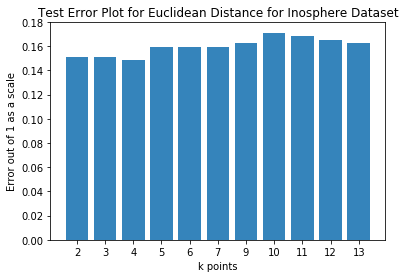

In [405]:
euc_error1 = []
euc_error2 = []
euc_error3 = []
euc_error4 = []
euc_error5 = []
k_values=[]

for k,v in ion_dict1.items():
    if (k[0]=='Euclidean'):
        euc_error1.append(1-v)
        k_values.append(k[1])
        

for k,v in ion_dict2.items():
    if (k[0]=='Euclidean'):
        euc_error2.append(1-v)
        

for k,v in ion_dict3.items():
    if (k[0]=='Euclidean'):
        euc_error3.append(1-v)
        

for k,v in ion_dict4.items():
    if (k[0]=='Euclidean'):
        euc_error4.append(1-v)
             

for k,v in ion_dict5.items():
    if (k[0]=='Euclidean'):
        euc_error5.append(1-v)
              

error_list_euc=np.array([euc_error1, euc_error2, euc_error3, euc_error4, euc_error5] )
# print(error_list_euc)
error_average_euc_ion = np.average(error_list_euc, axis=0)
# error_average_euc_ion_folds = np.average(error_list_euc, axis=1)
# print(error_average_euc_ion1)
# print(list(error_average_euc))
# plt.plot(n_list, a_euc_err_avg)
# plt.ylabel('accuracy')
# plt.xlabel('value of K')
# plt.title('Accuracy for Euclidean Distance for Ionospehre Dataset')
# plt.show()
# objects=tuple(k_values)
kpoints=np.arange(len(k_values))
test_avg_error=list(error_average_ion_euc)
# print(y_pos)
# print(performance)
plt.bar(kpoints, test_avg_error, align='center', alpha=0.9)
plt.xticks(kpoints, objects)
plt.ylabel('Error out of 1 as a scale')
plt.xlabel('k points')
plt.title('Test Error Plot for Euclidean Distance for Inosphere Dataset')
 
plt.show()

In [145]:
# k_values=[1,2,3]
# object=tuple(k_values)
# object

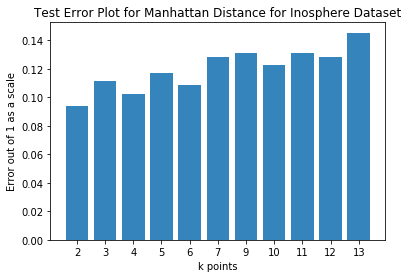

In [406]:
man_error1 = []
man_error2 = []
man_error3 = []
man_error4 = []
man_error5 = []
k_values=[]

for k,v in ion_dict1.items():
    if (k[0]=='Manhattan'):
        man_error1.append(1-v)
        k_values.append(k[1])
        

for k,v in ion_dict2.items():
    if (k[0]=='Manhattan'):
        man_error2.append(1-v)
        

for k,v in ion_dict3.items():
    if (k[0]=='Manhattan'):
        man_error3.append(1-v)
        

for k,v in ion_dict4.items():
    if (k[0]=='Manhattan'):
        man_error4.append(1-v)
             

for k,v in ion_dict5.items():
    if (k[0]=='Manhattan'):
        man_error5.append(1-v)
              

error_list_man=np.array([man_error1, man_error2, man_error3, man_error4, man_error5] )
# print(error_list_man)
error_average_man_ion = np.average(error_list_man, axis=0)
# print(error_average_man_ion)
# error_average_man_ion_folds = np.average(error_list_man, axis=1)
#Average for each fold - 
# print(error_average_man_ion_folds)
# print(list(error_average_euc))
# plt.plot(n_list, a_euc_err_avg)
# plt.ylabel('accuracy')
# plt.xlabel('value of K')
# plt.title('Accuracy for Euclidean Distance for Ionospehre Dataset')
# plt.show()
# objects=tuple(k_values)
kpoints=np.arange(len(k_values))
test_avg_error=list(error_average_man)
# print(y_pos)
# print(performance)
plt.bar(kpoints, test_avg_error, align='center', alpha=0.9)
plt.xticks(kpoints, objects)
plt.ylabel('Error out of 1 as a scale')
plt.xlabel('k points')
plt.title('Test Error Plot for Manhattan Distance for Inosphere Dataset')
 
plt.show()

In [175]:
#Reading car data
train_car1=pd.read_csv("car_train1.csv")
test_car1=pd.read_csv("car_test1.csv")

train_car2=pd.read_csv("car_train2.csv")
test_car2=pd.read_csv("car_test2.csv")

train_car3=pd.read_csv("car_train3.csv")
test_car3=pd.read_csv("car_test3.csv")

train_car4=pd.read_csv("car_train4.csv")
test_car4=pd.read_csv("car_test4.csv")

train_car5=pd.read_csv("car_train5.csv")
test_car5=pd.read_csv("car_test5.csv")


In [177]:
# train_car1


In [178]:
car_dict1= save_accuracy(train_car1,test_car1)
# car_dict1
max_dist= max(car_dict1, key=car_dict1.get)
print("Max distance metric for Car dataset 1 is:", max_dist, "with Accuracy", car_dict1[max_dist])

car_dict2= save_accuracy(train_car2,test_car2)
max_dist= max(car_dict2, key=car_dict2.get)
print("Max distance metric for Car dataset 2 is:", max_dist, "with Accuracy", car_dict2[max_dist])

car_dict3= save_accuracy(train_car3,test_car3)
max_dist= max(car_dict3, key=car_dict3.get)
print("Max distance metric for Car dataset 3 is:", max_dist, "with Accuracy", car_dict3[max_dist])

car_dict4= save_accuracy(train_car4,test_car4)
max_dist= max(car_dict4, key=car_dict4.get)
print("Max distance metric for Car dataset 4 is:", max_dist, "with Accuracy", car_dict4[max_dist])

car_dict5= save_accuracy(train_car5,test_car5)
max_dist= max(car_dict5, key=car_dict5.get)
print("Max distance metric for Car dataset 5 is:", max_dist, "with Accuracy", car_dict5[max_dist])



Max distance metric for Car dataset 1 is: ('Euclidean', 7) with Accuracy 0.9682080924855492
Max distance metric for Car dataset 2 is: ('Euclidean', 7) with Accuracy 0.9566473988439307
Max distance metric for Car dataset 3 is: ('Euclidean', 6) with Accuracy 0.9624277456647399
Max distance metric for Car dataset 4 is: ('Euclidean', 7) with Accuracy 0.9479768786127167
Max distance metric for Car dataset 5 is: ('Euclidean', 7) with Accuracy 0.9651162790697675


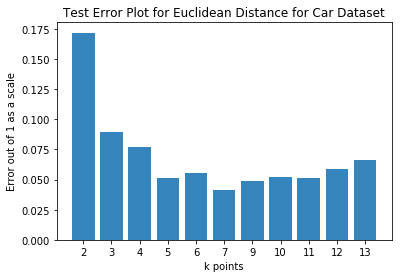

In [407]:
car_euc_error1 = []
car_euc_error2 = []
car_euc_error3 = []
car_euc_error4 = []
car_euc_error5 = []
k_values=[]

for k,v in car_dict1.items():
    if (k[0]=='Euclidean'):
        car_euc_error1.append(1-v)
        k_values.append(k[1])
        

for k,v in car_dict2.items():
    if (k[0]=='Euclidean'):
        car_euc_error2.append(1-v)
        

for k,v in car_dict3.items():
    if (k[0]=='Euclidean'):
        car_euc_error3.append(1-v)
        

for k,v in car_dict4.items():
    if (k[0]=='Euclidean'):
        car_euc_error4.append(1-v)
             

for k,v in car_dict5.items():
    if (k[0]=='Euclidean'):
        car_euc_error5.append(1-v)
              

error_list_car=np.array([car_euc_error1, car_euc_error2, car_euc_error3, car_euc_error4, car_euc_error5])
error_average_euc_car = np.average(error_list_car, axis=0)
# error_average_euc_car_folds = np.average(error_list_car, axis=1)
# print(list(error_average_euc))
# plt.plot(n_list, a_euc_err_avg)
# plt.ylabel('accuracy')
# plt.xlabel('value of K')
# plt.title('Accuracy for Euclidean Distance for Ionospehre Dataset')
# plt.show()
# objects=tuple(k_values)
kpoints=np.arange(len(k_values))
test_avg_error=list(error_average_car_euc)
# print(y_pos)
# print(performance)
plt.bar(kpoints, test_avg_error, align='center', alpha=0.9)
plt.xticks(kpoints, objects)
plt.ylabel('Error out of 1 as a scale')
plt.xlabel('k points')
plt.title('Test Error Plot for Euclidean Distance for Car Dataset')
 
plt.show()

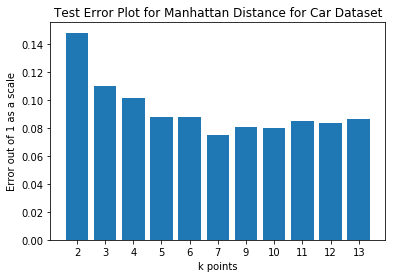

In [408]:
car_man_error1 = []
car_man_error2 = []
car_man_error3 = []
car_man_error4 = []
car_man_error5 = []
k_values=[]

for k,v in car_dict1.items():
    if (k[0]=='Manhattan'):
        car_man_error1.append(1-v)
        k_values.append(k[1])
        

for k,v in car_dict2.items():
    if (k[0]=='Manhattan'):
        car_man_error2.append(1-v)
        

for k,v in car_dict3.items():
    if (k[0]=='Manhattan'):
        car_man_error3.append(1-v)
        

for k,v in ion_dict4.items():
    if (k[0]=='Manhattan'):
        car_man_error4.append(1-v)
             

for k,v in ion_dict5.items():
    if (k[0]=='Manhattan'):
        car_man_error5.append(1-v)
              

error_list_car=np.array([car_man_error1, car_man_error2, car_man_error3, car_man_error4, car_man_error5] )
error_average_man_car = np.average(error_list_car, axis=0)

# print(list(error_average_euc))
# plt.plot(n_list, a_euc_err_avg)
# plt.ylabel('accuracy')
# plt.xlabel('value of K')
# plt.title('Accuracy for Euclidean Distance for Ionospehre Dataset')
# plt.show()
# objects=tuple(k_values)
kpoints=np.arange(len(k_values))
test_avg_error=list(error_average_car)
# print(y_pos)
# print(performance)
plt.bar(kpoints, test_avg_error, align='center', alpha=1)
plt.xticks(kpoints, objects)
plt.ylabel('Error out of 1 as a scale')
plt.xlabel('k points')
plt.title('Test Error Plot for Manhattan Distance for Car Dataset')
 
plt.show()

2.2 Use the data sets obtained in problem 1 to determine the optimal k over each data set for KNN algorithm. For 5 different k values, plot the test error for each data set. Total number of figures = 3 (data set number) × 2 (distance function number) = 6. Report the best k and distance function for each data set.

In [197]:
#Reading credit data
train_credit1=pd.read_csv("credit_train1.csv")
test_credit1=pd.read_csv("credit_test1.csv")

train_credit2=pd.read_csv("credit_train2.csv")
test_credit2=pd.read_csv("credit_test2.csv")

train_credit3=pd.read_csv("credit_train3.csv")
test_credit3=pd.read_csv("credit_test3.csv")

train_credit4=pd.read_csv("credit_train4.csv")
test_credit4=pd.read_csv("credit_test4.csv")

train_credit5=pd.read_csv("credit_train5.csv")
test_credit5=pd.read_csv("credit_test5.csv")

# train_credit5
#stratified k-fold
#drop the sample
#treat as missing value.

In [196]:
credit_dict1= save_accuracy(train_credit1,test_credit1)
max_dist= max(credit_dict1, key=credit_dict1.get)
print("Max distance metric for Credit dataset 1 is:", max_dist, "with Accuracy", credit_dict1[max_dist])

credit_dict2= save_accuracy(train_credit2,test_credit2)
max_dist= max(credit_dict2, key=credit_dict2.get)
print("Max distance metric for Credit dataset 2 is:", max_dist, "with Accuracy", credit_dict2[max_dist])

credit_dict3= save_accuracy(train_credit3,test_credit3)
max_dist= max(credit_dict3, key=credit_dict3.get)
print("Max distance metric for Credit dataset 3 is:", max_dist, "with Accuracy", credit_dict3[max_dist])

credit_dict4= save_accuracy(train_credit4,test_credit4)
max_dist= max(credit_dict4, key=credit_dict4.get)
print("Max distance metric for Credit dataset 4 is:", max_dist, "with Accuracy", credit_dict4[max_dist])

credit_dict5= save_accuracy(train_credit5,test_credit5)
max_dist= max(credit_dict5, key=credit_dict1.get)
print("Max distance metric for Credit dataset 5 is:", max_dist, "with Accuracy", credit_dict5[max_dist])

Max distance metric for Credit dataset 1 is: ('Manhattan', 4) with Accuracy 0.8091603053435115
Max distance metric for Credit dataset 2 is: ('Manhattan', 3) with Accuracy 0.732824427480916
Max distance metric for Credit dataset 3 is: ('Manhattan', 5) with Accuracy 0.7786259541984732
Max distance metric for Credit dataset 4 is: ('Manhattan', 13) with Accuracy 0.7633587786259542
Max distance metric for Credit dataset 5 is: ('Manhattan', 4) with Accuracy 0.751937984496124


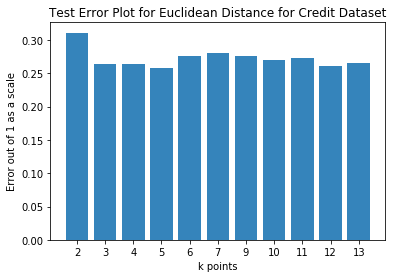

In [410]:
credit_euc_error1 = []
credit_euc_error2 = []
credit_euc_error3 = []
credit_euc_error4 = []
credit_euc_error5 = []
k_values=[]

for k,v in credit_dict1.items():
    if (k[0]=='Euclidean'):
        credit_euc_error1.append(1-v)
        k_values.append(k[1])
        

for k,v in credit_dict2.items():
    if (k[0]=='Euclidean'):
        credit_euc_error2.append(1-v)
        

for k,v in credit_dict3.items():
    if (k[0]=='Euclidean'):
        credit_euc_error3.append(1-v)
        

for k,v in credit_dict4.items():
    if (k[0]=='Euclidean'):
        credit_euc_error4.append(1-v)
             

for k,v in credit_dict5.items():
    if (k[0]=='Euclidean'):
        credit_euc_error5.append(1-v)
              

error_list_credit=np.array([credit_euc_error1, credit_euc_error2, credit_euc_error3, credit_euc_error4, credit_euc_error5])
error_average_euc_credit = np.average(error_list_credit, axis=0)
# error_average_euc_credit = np.average(error_list_car, axis=1)
# print(list(error_average_euc))
# plt.plot(n_list, a_euc_err_avg)
# plt.ylabel('accuracy')
# plt.xlabel('value of K')
# plt.title('Accuracy for Euclidean Distance for Ionospehre Dataset')
# plt.show()
# objects=tuple(k_values)
kpoints=np.arange(len(k_values))
test_avg_error=list(error_average_euc_credit)
# print(y_pos)
# print(performance)
plt.bar(kpoints, test_avg_error, align='center', alpha=0.9)
plt.xticks(kpoints, objects)
plt.ylabel('Error out of 1 as a scale')
plt.xlabel('k points')
plt.title('Test Error Plot for Euclidean Distance for Credit Dataset')
 
plt.show()

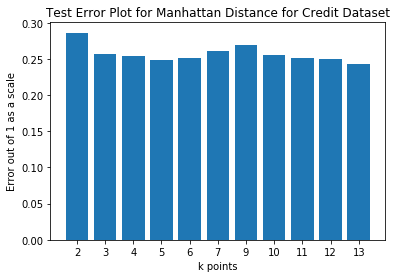

In [411]:
credit_man_error1 = []
credit_man_error2 = []
credit_man_error3 = []
credit_man_error4 = []
credit_man_error5 = []
k_values=[]

for k,v in credit_dict1.items():
    if (k[0]=='Manhattan'):
        credit_man_error1.append(1-v)
        k_values.append(k[1])
        

for k,v in credit_dict2.items():
    if (k[0]=='Manhattan'):
        credit_man_error2.append(1-v)
        

for k,v in credit_dict3.items():
    if (k[0]=='Manhattan'):
        credit_man_error3.append(1-v)
        

for k,v in credit_dict4.items():
    if (k[0]=='Manhattan'):
        credit_man_error4.append(1-v)
             

for k,v in credit_dict5.items():
    if (k[0]=='Manhattan'):
        credit_man_error5.append(1-v)
              

error_list_credit_man=np.array([credit_man_error1, credit_man_error2, credit_man_error3, credit_man_error4, credit_man_error5] )
error_average_man_credit = np.average(error_list_credit_man, axis=0)

# print(list(error_average_euc))
# plt.plot(n_list, a_euc_err_avg)
# plt.ylabel('accuracy')
# plt.xlabel('value of K')
# plt.title('Accuracy for Euclidean Distance for Ionospehre Dataset')
# plt.show()
# objects=tuple(k_values)
kpoints=np.arange(len(k_values))
test_avg_error=list(error_average_man_credit)
# print(y_pos)
# print(performance)
plt.bar(kpoints, test_avg_error, align='center', alpha=1)
plt.xticks(kpoints, objects)
plt.ylabel('Error out of 1 as a scale')
plt.xlabel('k points')
plt.title('Test Error Plot for Manhattan Distance for Credit Dataset')
 
plt.show()

2.3 Use sklearn's KNN implementation for validation.

Ionosphere Sklearn

In [296]:
# Code for problem 2.3 goes here
#Referenced from KNN_Scikit Learn documentation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[2,3,4,5,6,7,9,10,11,12,13],'metric':["euclidean", "manhattan"]}
model = GridSearchCV(knn, param_grid=parameters)
model.fit(inosphere_data.iloc[:,:-1],inosphere_data.iloc[:,-1])
print("Using Scikit learn Implementation, the best K-NN model is:")
print("Best Parameters:",model.best_params_)
print("Accuracy for Inosphere dataset:",(model.best_score_)*100)
print("Error for Inosphere dataset:",(1 - model.best_score_)*100)

Using Scikit learn Implementation, the best K-NN model is:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2}
Accuracy for Inosphere dataset: 90.14084507042254
Error for Inosphere dataset: 9.859154929577462


Using own implementation from above - The best K-NN model for Inoshphere dataset comes out to be with Manhattan distance metric , 2 neighbours and 94% Accuracy

In [297]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[2,3,4,5,6,7,9,10,11,12,13],'metric':["euclidean", "manhattan"]}
model = GridSearchCV(knn, param_grid=parameters)
model.fit(car_data.iloc[:,:-1],car_data.iloc[:,-1])
print("Using Scikit learn Implementation, the best K-NN model is:")
print("Best Parameters:",model.best_params_)
print("Accuracy for Credit Dataset:",(model.best_score_)*100)
print("Error for Credit Dataset:",(1 - model.best_score_)*100)

Using Scikit learn Implementation, the best K-NN model is:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2}
Accuracy for Credit Dataset: 82.58101851851852
Error for Credit Dataset: 17.418981481481477


Using own implementation , the best K-NN model for Credit dataset comes out to be with Manhattan distance metric , 4 neighbours and 80 % Accuracy.


In [298]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[2,3,4,5,6,7,9,10,11,12,13],'metric':["euclidean", "manhattan"]}
model = GridSearchCV(knn, param_grid=parameters)
model.fit(credit_data.iloc[:,:-1],credit_data.iloc[:,-1])
print("Using Scikit learn Implementation, the best K-NN model is:")
print("Best Parameters:",model.best_params_)
print("Accuracy for Credit dataset:",(model.best_score_)*100)
print("Error for Credit dataset:",(1 - model.best_score_)*100)

Using Scikit learn Implementation, the best K-NN model is:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4}
Accuracy for Credit dataset: 69.37212863705973
Error for Credit dataset: 30.627871362940272


The best K-NN model for Credit dataset comes out to be with Euclidean distance metric , 7 neighbours and 96.82 % Accuracy.

## Problem 3: Naive Bayes Classifier [30 points]

3.1 Implement Naive Bayes classifier. You may need to modify it for categorical variables. To handle unseen feature values, you may need to make use Laplace smoothing or the m-estimate of conditional probability method.

In [235]:
# Code for problem 3.1 goes here
#Refernced from https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/ and discussed with Karan Kamatgi

In [238]:
#Calculating mean and standard deviation
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def sd(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [239]:
#Summarizing the dataset
def summarize(dataset):
    summaries = [(mean(attribute), sd(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries
 
def summarizeByClass(dataset):
   # separated = separateByClass(dataset)
    separated = {}
    summaries = {}
    for i in range(len(dataset)):
        vector = dataset.iloc[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [240]:
#Calculating the mean
def calculateProbability(x, mean, sd,col):
    try:
        exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(sd,2))))
        return (1 / (math.sqrt(2*math.pi) * sd+0.01)) * exponent
    except:
        return mean

In [241]:
#Predictions
def predict(summaries, inputVector):
   # probabilities = calculateClassProbabilities(summaries, inputVector)
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, sd = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, sd,i)

    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
 
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)): 
        result = predict(summaries, testSet.iloc[i])
        predictions.append(result)
    return predictions

In [242]:
#Calculating the accuracy and error
def calculate_accuracy_error(testSet, predictions):
    count = 0
    for i in range(len(testSet)):
        if testSet.iloc[i][-1] == predictions[i]:
            count += 1
    accuracy = (count/float(len(testSet))) * 100.0
    error = 100-accuracy
    return accuracy, error

3.2 Train Naive Bayes classifiers over training data sets and test each classifier against corresponding test data. Make a plot that shows the error over each test data. Report the average error rate for 5-fold cross validation for each data sets.

Naive Bayes Classifier for Inoshphere Dataset

In [ ]:
# Code for problem 3.2 goes here

In [244]:
def inosphere_NB(train,test):
    train_ion=pd.read_csv(train)
    test_ion=pd.read_csv(test)
    train_ion.iloc[:,-1] = train_ion.iloc[:,-1].map({'g': 1, 'b': 0})
    test_ion.iloc[:,-1] = test_ion.iloc[:,-1].map({'g': 1, 'b': 0})
    train_ion.drop(train_ion.iloc[:, 0:2], inplace=True, axis=1)
    test_ion.drop(test_ion.iloc[:, 0:2], inplace=True, axis=1)
    return train_ion,test_ion


In [377]:
#Fold1
error_ion_nb=[]
trainingSet,testSet = inosphere_NB('ion_train1.csv','ion_test1.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_ion1,error_ion1 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for first Inosphere test set :',accuracy_ion1)
print('Error for first Inoshphere test set:',error_ion1)
error_ion_nb.append(error_ion1)
print()

#Fold2
trainingSet,testSet = inosphere_NB('ion_train2.csv','ion_test2.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_ion2,error_ion2 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for second Inosphere test set :',accuracy_ion2)
print('Error for second Inoshphere test set:',error_ion2)
error_ion_nb.append(error_ion2)
print()

#Fold3
trainingSet,testSet = inosphere_NB('ion_train3.csv','ion_test3.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_ion3,error_ion3 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for third Inosphere test set :',accuracy_ion3)
print('Error for third Inoshphere test set:',error_ion3)
error_ion_nb.append(error_ion3)
print()

#Fold4
trainingSet,testSet = inosphere_NB('ion_train4.csv','ion_test4.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_ion4,error_ion4 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for fourth Inoshphere test set:',accuracy_ion4)
print('Error for  fourth Inoshphere test set:',error_ion4)
error_ion_nb.append(error_ion4)
print()

#Fold5
trainingSet,testSet = inosphere_NB('ion_train5.csv','ion_test5.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_ion5,error_ion5 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for fifth Inoshpere test set :',accuracy_ion5)
print('Error for fifth Inoshpere test set:',error_ion5)
error_ion_nb.append(error_ion5)
# print(error_ion_nb)

Accuracy for first Inosphere test set : 84.28571428571429
Error for first Inoshphere test set: 15.714285714285708

Accuracy for second Inosphere test set : 80.0
Error for second Inoshphere test set: 20.0

Accuracy for third Inosphere test set : 77.14285714285715
Error for third Inoshphere test set: 22.857142857142847

Accuracy for fourth Inoshphere test set: 82.85714285714286
Error for  fourth Inoshphere test set: 17.14285714285714

Accuracy for fifth Inoshpere test set : 80.28169014084507
Error for fifth Inoshpere test set: 19.718309859154928


In [247]:
#reference - https://pythonspot.com/matplotlib-bar-chart/

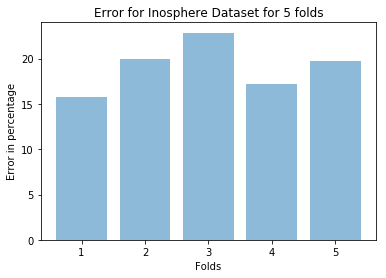

In [378]:
# error_ion=np.array(error_ion)
error_ion_nb=list(error_ion_nb)
# error_ion_avg=np.average(error_ion)
fold_list=[1,2,3,4,5]
# plt.plot(fold_list,error_ion)
# plt.ylabel('error in percentage')
# plt.xlabel('value of K')
# plt.title("Error for Inosphere Dataset for 5 folds")
# plt.show()
# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(fold_list))
performance = error_ion_nb
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, fold_list)
plt.ylabel('Error in percentage')
plt.title("Error for Inosphere Dataset for 5 folds")
plt.xlabel('Folds')
plt.show()

In [249]:
def Credit_NB(train,test):
    train_credit=pd.read_csv(train)
    test_credit=pd.read_csv(test)
    return train_credit,test_credit

In [380]:
#Car_NB('credit_train1.csv','credit_test1.csv')
error_credit_nb=[]

trainingSet,testSet = Credit_NB('credit_train1.csv','credit_test1.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_credit1,error_credit1 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for first Credit test set :',accuracy_credit1)
print('Error for first Credit test set:',error_credit1)
error_credit_nb.append(error_credit1)
print()

trainingSet,testSet = Credit_NB('credit_train2.csv','credit_test2.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_credit2,error_credit2 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for second Credit test set :',accuracy_credit2)
print('Error for second Credit test set:',error_credit2)
error_credit_nb.append(error_credit2)
print()


trainingSet,testSet = Credit_NB('credit_train3.csv','credit_test3.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_credit3,error_credit3 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for third Credit test set :',accuracy_credit3)
print('Error for third Credit test set:',error_credit3)
error_credit_nb.append(error_credit3)
print()

trainingSet,testSet = Credit_NB('credit_train4.csv','credit_test4.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_credit4,error_credit4 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for fourth Credit test set :',accuracy_credit4)
print('Error for fourth Credit test set:',error_credit4)
error_credit_nb.append(error_credit4)
print()


trainingSet,testSet = Credit_NB('credit_train5.csv','credit_test5.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_credit5,error_credit5 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for fifth Credit test set :',accuracy_credit5)
print('Error for fifth Credit test set:',error_credit5)
error_credit_nb.append(error_credit5)
# print(error_credit_nb)

Accuracy for first Credit test set : 85.49618320610686
Error for first Credit test set: 14.503816793893137

Accuracy for second Credit test set : 81.67938931297711
Error for second Credit test set: 18.320610687022892

Accuracy for third Credit test set : 76.33587786259542
Error for third Credit test set: 23.664122137404576

Accuracy for fourth Credit test set : 80.1526717557252
Error for fourth Credit test set: 19.847328244274806

Accuracy for fifth Credit test set : 77.51937984496125
Error for fifth Credit test set: 22.48062015503875


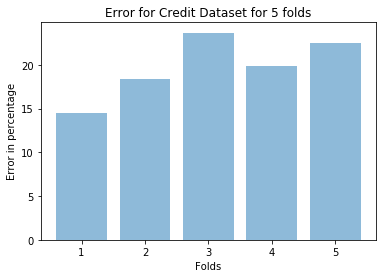

In [381]:
# print(error_credit)
# error_credit=np.array(error_credit)
error_ion_avg=np.average(error_credit_nb)
fold_list=[1,2,3,4,5]
# plt.plot(fold_list,error_credit)
# plt.ylabel('error in percentage')
# plt.xlabel('value of K')
# plt.title("Error for Credit Dataset for 5 folds")
# plt.show()
y_pos = np.arange(len(fold_list))
performance = error_credit_nb
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, fold_list)
plt.ylabel('Error in percentage')
plt.xlabel('Folds')
plt.title("Error for Credit Dataset for 5 folds")
 
plt.show()

In [253]:
def Car_NB(train,test):
    train_car=pd.read_csv(train)
    test_car=pd.read_csv(test)
    return train_car,test_car

In [383]:
error_car_nb=[]
trainingSet,testSet = Car_NB('car_train1.csv','car_test1.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_car1,error_car1 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for first Car test set :',accuracy_car1)
print('Error for fifth Car test set:',error_car1)
error_car_nb.append(error_car1)
print()

trainingSet,testSet = Car_NB('car_train2.csv','car_test2.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_car2,error_car2 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for second car test set :',accuracy_car2)
print('Error for second car test set:',error_car2)
error_car_nb.append(error_car2)
print()

trainingSet,testSet = Car_NB('car_train3.csv','car_test3.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_car3,error_car3 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for third car test set :',accuracy_car3)
print('Error for third car test set:',error_car3)
error_car_nb.append(error_car3)
print()


trainingSet,testSet = Car_NB('car_train4.csv','car_test4.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_car4,error_car4 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for third car test set :',accuracy_car4)
print('Error for third car test set:',error_car4)
error_car_nb.append(error_car4)
print()


trainingSet,testSet = Car_NB('car_train5.csv','car_test5.csv')
#print(len(trainingSet), len(testSet))
# prepare model
summaries = summarizeByClass(trainingSet)
# test model
predictions = getPredictions(summaries, testSet)
accuracy_car5,error_car5 = calculate_accuracy_error (testSet, predictions)
print('Accuracy for third car test set :',accuracy_car5)
print('Error for third car test set:',error_car5)
error_car_nb.append(error_car5)
# print(error_car_nb)

Accuracy for first Car test set : 69.94219653179191
Error for fifth Car test set: 30.057803468208093

Accuracy for second car test set : 63.29479768786127
Error for second car test set: 36.70520231213873

Accuracy for third car test set : 68.78612716763006
Error for third car test set: 31.213872832369944

Accuracy for third car test set : 68.78612716763006
Error for third car test set: 31.213872832369944

Accuracy for third car test set : 70.93023255813954
Error for third car test set: 29.069767441860463


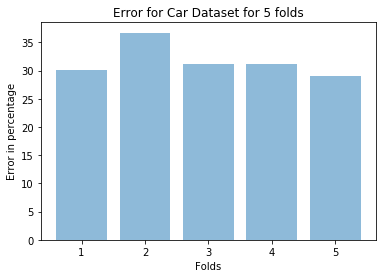

In [384]:
# print(error_car)
# error_ion=np.array(error_car)
# error_ion_avg=np.average(error_car)
fold_list=[1,2,3,4,5]
# plt.plot(fold_list,error_car)
# plt.ylabel('error in percentage')
# plt.xlabel('value of K')
# plt.title("Error for Credit Dataset for 5 folds")
# plt.show()
y_pos = np.arange(len(fold_list))
performance = error_car_nb
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, fold_list)
plt.ylabel('Error in percentage')
plt.xlabel('Folds')
plt.title("Error for Car Dataset for 5 folds")
 
plt.show()

3.3 Use Naive Bayes package in sklearn for validation.

In [265]:
# Code for problem 3.3 goes here
# Code for problem 2.3 goes here
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
clf = GaussianNB()

In [266]:
clf.fit(train_ion1.iloc[:, :-1], train_ion1.iloc[:,-1])
accuracy1=clf.score(test_ion1.iloc[:, :-1], test_ion1.iloc[:,-1])
print("Accuracy for first Inoshphere test set is:",accuracy1)

clf.fit(train_ion2.iloc[:, :-1], train_ion2.iloc[:,-1])
accuracy2=clf.score(test_ion2.iloc[:, :-1], test_ion2.iloc[:,-1])
print("Accuracy for second Inoshphere test set is:",accuracy2)

clf.fit(train_ion3.iloc[:, :-1], train_ion3.iloc[:,-1])
accuracy3=clf.score(test_ion3.iloc[:, :-1], test_ion3.iloc[:,-1])
print("Accuracy for third Inoshphere test set is:",accuracy3)

clf.fit(train_ion4.iloc[:, :-1], train_ion4.iloc[:,-1])
accuracy4=clf.score(test_ion4.iloc[:, :-1], test_ion4.iloc[:,-1])
print("Accuracy for fourth Inoshphere test set is:",accuracy4)

clf.fit(train_ion5.iloc[:, :-1], train_ion5.iloc[:,-1])
accuracy5=clf.score(test_ion5.iloc[:, :-1], test_ion5.iloc[:,-1])
print("Accuracy for fifth Inoshphere test set is:",accuracy5)

Accuracy for first Inoshphere test set is: 0.9
Accuracy for second Inoshphere test set is: 0.9142857142857143
Accuracy for third Inoshphere test set is: 0.8571428571428571
Accuracy for fourth Inoshphere test set is: 0.8714285714285714
Accuracy for fifth Inoshphere test set is: 0.8873239436619719


In [267]:
clf.fit(train_car1.iloc[:, :-1], train_car1.iloc[:,-1])
accuracy_c1=clf.score(test_car1.iloc[:, :-1], test_car1.iloc[:,-1])
print("Accuracy for first car test set is:",accuracy_c1)
    
clf.fit(train_car2.iloc[:, :-1], train_car2.iloc[:,-1])
accuracy_c2=clf.score(test_car2.iloc[:, :-1], test_car2.iloc[:,-1])
print("Accuracy for second car test set is:",accuracy_c2)

clf.fit(train_car3.iloc[:, :-1], train_car3.iloc[:,-1])
accuracy_c3=clf.score(test_car3.iloc[:, :-1], test_car3.iloc[:,-1])
print("Accuracy of third car test set is:",accuracy_c3)


clf.fit(train_car4.iloc[:, :-1], train_car4.iloc[:,-1])
accuracy_c4=clf.score(test_car4.iloc[:, :-1], test_car4.iloc[:,-1])
print("Accuracy of fourth car test set is:",accuracy_c4)

clf.fit(train_car5.iloc[:, :-1], train_car5.iloc[:,-1])
accuracy_c5=clf.score(test_car5.iloc[:, :-1], test_car5.iloc[:,-1])
print("Accuracy of fifth car test set is:",accuracy_c5)


Accuracy for first car test set is: 0.7138728323699421
Accuracy for second car test set is: 0.7196531791907514
Accuracy of third car test set is: 0.7254335260115607
Accuracy of fourth car test set is: 0.6473988439306358
Accuracy of fifth car test set is: 0.6947674418604651


In [268]:
clf1 = MultinomialNB()
clf.fit(train_credit1.iloc[:, :-1], train_credit1.iloc[:,-1])
accuracy_cred1=clf.score(test_credit1.iloc[:, :-1], test_credit1.iloc[:,-1])
print("Accuracy for first credit test set is:",accuracy_cred1)

clf.fit(train_credit2.iloc[:, :-1], train_credit2.iloc[:,-1])
accuracy_cred2=clf.score(test_credit2.iloc[:, :-1], test_credit2.iloc[:,-1])
print("Accuracy for second credit test set is:",accuracy_cred1)

clf.fit(train_credit3.iloc[:, :-1], train_credit3.iloc[:,-1])
accuracy_cred3=clf.score(test_credit3.iloc[:, :-1], test_credit3.iloc[:,-1])
print("Accuracy for third credit test set is:",accuracy_cred3)

clf.fit(train_credit4.iloc[:, :-1], train_credit4.iloc[:,-1])
accuracy_cred4=clf.score(test_credit4.iloc[:, :-1], test_credit4.iloc[:,-1])
print("Accuracy for fourth credit test set is:",accuracy_cred4)

clf.fit(train_credit5.iloc[:, :-1], train_credit5.iloc[:,-1])
accuracy_cred5=clf.score(test_credit5.iloc[:, :-1], test_credit5.iloc[:,-1])
print("Accuracy for fifth credit test set is:",accuracy_cred5)

Accuracy for first credit test set is: 0.8549618320610687
Accuracy for second credit test set is: 0.8549618320610687
Accuracy for third credit test set is: 0.7404580152671756
Accuracy for fourth credit test set is: 0.7938931297709924
Accuracy for fifth credit test set is: 0.7286821705426356


## Problem 4: Naive Bayes Classifier vs. K-Nearest Neighbors [10 points]


In this question, you are asked to compare Naive Bayes classifier with K-NN algorithm. First, determine the best K-NN model for each data set. Then, make a plot that reveals comparison of two algorithms using test error for each data set. (Total number of figures = 3)

In [277]:
ion_dict1= save_accuracy(train_ion1,test_ion1)
max_dist1= max(ion_dict1, key=ion_dict1.get)
print("Max distance metric for Inosphere dataset 1 is:", max_dist1, "with Accuracy", ion_dict1[max_dist])

ion_dict2= save_accuracy(train_ion2,test_ion2)
max_dist2= max(ion_dict2, key=ion_dict2.get)
print("Max distance metric for Inosphere dataset 2 is:", max_dist2, "with Accuracy", ion_dict2[max_dist])

ion_dict3= save_accuracy(train_ion3,test_ion3)
max_dist3= max(ion_dict3, key=ion_dict3.get)
print("Max distance metric for Inosphere dataset 3 is:", max_dist3, "with Accuracy", ion_dict3[max_dist])

ion_dict4= save_accuracy(train_ion4,test_ion4)
max_dist4= max(ion_dict4, key=ion_dict4.get)
print("Max distance metric for Inosphere dataset 4 is:", max_dist4, "with Accuracy", ion_dict4[max_dist])

ion_dict5= save_accuracy(train_ion5,test_ion5)
max_dist5= max(ion_dict5, key=ion_dict5.get)
print("Max distance metric for Inosphere dataset 5 is:", max_dist5, "with Accuracy", ion_dict5[max_dist])

Max distance metric for Inosphere dataset 1 is: ('Manhattan', 2) with Accuracy 0.8142857142857143
Max distance metric for Inosphere dataset 2 is: ('Manhattan', 2) with Accuracy 0.7714285714285715
Max distance metric for Inosphere dataset 3 is: ('Manhattan', 4) with Accuracy 0.8714285714285714
Max distance metric for Inosphere dataset 4 is: ('Manhattan', 9) with Accuracy 0.8714285714285714
Max distance metric for Inosphere dataset 5 is: ('Manhattan', 2) with Accuracy 0.8732394366197183


In [291]:
Accuracy_ion = max(ion_dict1[max_dist1],ion_dict2[max_dist2],ion_dict3[max_dist3],ion_dict4[max_dist4],ion_dict5[max_dist5])
Avg_Error_ion = 1-Accuracy_ion
print("Maximum Accuracy for Inosphere dataset is:",Accuracy_ion)

Maximum Accuracy for Inosphere dataset is: 0.9285714285714286


The best K-NN model for Inoshphere dataset comes out to be with Manhattan distance metric , 2 neighbours and 94% Accuracy

In [281]:
credit_dict1= save_accuracy(train_credit1,test_credit1)
max_dist1= max(credit_dict1, key=credit_dict1.get)
print("Max distance metric for Credit dataset 1 is:", max_dist1, "with Accuracy", credit_dict1[max_dist1])

credit_dict2= save_accuracy(train_credit2,test_credit2)
max_dist2= max(credit_dict2, key=credit_dict2.get)
print("Max distance metric for Credit dataset 2 is:", max_dist2, "with Accuracy", credit_dict2[max_dist2])

credit_dict3= save_accuracy(train_credit3,test_credit3)
max_dist3= max(credit_dict3, key=credit_dict3.get)
print("Max distance metric for Credit dataset 3 is:", max_dist3, "with Accuracy", credit_dict3[max_dist3])

credit_dict4= save_accuracy(train_credit4,test_credit4)
max_dist4= max(credit_dict4, key=credit_dict4.get)
print("Max distance metric for Credit dataset 4 is:", max_dist4, "with Accuracy", credit_dict4[max_dist4])

credit_dict5= save_accuracy(train_credit5,test_credit5)
max_dist5= max(credit_dict5, key=credit_dict1.get)
print("Max distance metric for Credit dataset 5 is:", max_dist, "with Accuracy", credit_dict5[max_dist5])

Max distance metric for Credit dataset 1 is: ('Manhattan', 4) with Accuracy 0.8091603053435115
Max distance metric for Credit dataset 2 is: ('Manhattan', 3) with Accuracy 0.732824427480916
Max distance metric for Credit dataset 3 is: ('Manhattan', 5) with Accuracy 0.7786259541984732
Max distance metric for Credit dataset 4 is: ('Manhattan', 13) with Accuracy 0.7633587786259542
Max distance metric for Credit dataset 5 is: ('Euclidean', 7) with Accuracy 0.751937984496124


In [290]:
Accuracy_credit= max(credit_dict1[max_dist1],credit_dict2[max_dist2],credit_dict3[max_dist3],credit_dict4[max_dist4],credit_dict5[max_dist5])
Avg_Error_credit = 1-Accuracy_credit
print("Maximum Accuracy for Credit dataset is:",Accuracy_credit)

Maximum Accuracy for Credit dataset is: 0.8091603053435115


The best K-NN model for Credit dataset comes out to be with Manhattan distance metric , 4 neighbours and 80 % Accuracy.


In [295]:
car_dict1= save_accuracy(train_car1,test_car1)
# car_dict1
max_dist1= max(car_dict1, key=car_dict1.get)
print("Max distance metric for Car dataset 1 is:", max_dist1, "with Accuracy", car_dict1[max_dist1])

car_dict2= save_accuracy(train_car2,test_car2)
max_dist2= max(car_dict2, key=car_dict2.get)
print("Max distance metric for Car dataset 2 is:", max_dist2, "with Accuracy", car_dict2[max_dist2])

car_dict3= save_accuracy(train_car3,test_car3)
max_dist3= max(car_dict3, key=car_dict3.get)
print("Max distance metric for Car dataset 3 is:", max_dist3, "with Accuracy", car_dict3[max_dist3])

car_dict4= save_accuracy(train_car4,test_car4)
max_dist4= max(car_dict4, key=car_dict4.get)
print("Max distance metric for Car dataset 4 is:", max_dist4, "with Accuracy", car_dict4[max_dist4])

car_dict5= save_accuracy(train_car5,test_car5)
max_dist5= max(car_dict5, key=car_dict5.get)
print("Max distance metric for Car dataset 5 is:", max_dist5, "with Accuracy", car_dict5[max_dist5])


Max distance metric for Car dataset 1 is: ('Euclidean', 7) with Accuracy 0.9682080924855492
Max distance metric for Car dataset 2 is: ('Euclidean', 7) with Accuracy 0.9566473988439307
Max distance metric for Car dataset 3 is: ('Euclidean', 6) with Accuracy 0.9624277456647399
Max distance metric for Car dataset 4 is: ('Euclidean', 7) with Accuracy 0.9479768786127167
Max distance metric for Car dataset 5 is: ('Euclidean', 7) with Accuracy 0.9651162790697675


In [299]:
Accuracy_car=max(car_dict1[max_dist1],car_dict2[max_dist2],car_dict3[max_dist3],car_dict4[max_dist4],car_dict5[max_dist5])
Avg_Error_car = 1-Accuracy_car
print("Maximum Accuracy for Car dataset is: ", Accuracy_car)

Maximum Accuracy for Car dataset is:  0.9682080924855492


The best K-NN model for Car dataset comes out to be with Euclidean distance metric , 7 neighbours and 96.82 % Accuracy

In [402]:
#Inosphere Dataset Errors for KNN
error_list_man=np.array([man_error1, man_error2, man_error3, man_error4, man_error5] )
# print(error_list_man)
error_average_man_ion_folds = np.average(error_list_man, axis=1)
#Average for each fold for manhattan dist - 
# print(error_average_man_ion_folds)
error_average_man_ion_folds=list(error_average_man_ion_folds)
# print(error_average_man_ion_folds)

error_list_euc=np.array([euc_error1, euc_error2, euc_error3, euc_error4, euc_error5] )
# print(error_list_euc)
# error_average_euc_ion = np.average(error_list_euc, axis=0)
error_average_euc_ion_folds = np.average(error_list_euc, axis=1)
error_average_euc_ion_folds = list(error_average_euc_ion_folds)
# print(error_average_euc_ion_folds)

final_ion_error=[]
for i,j in zip(error_average_man_ion_folds,error_average_euc_ion_folds):
    final_ion_error.append((i+j)/2)
# print(final_ion_error)

In [401]:
#Car Dataset erros for KNN
error_list_car=np.array([car_euc_error1, car_euc_error2, car_euc_error3, car_euc_error4, car_euc_error5])
# error_average_euc_car = np.average(error_list_car, axis=0)
error_average_euc_car_folds = np.average(error_list_car, axis=1)
error_average_euc_car_folds=list(error_average_euc_car_folds)
# print(error_average_euc_car_folds)


error_list_car1=np.array([car_man_error1, car_man_error2, car_man_error3, car_man_error4, car_man_error5] )
error_average_man_car_folds = np.average(error_list_car1, axis=1)
error_average_man_car=list(error_average_man_car_folds)
# print(error_average_man_car)

final_car_error=[]
for i,j in zip(error_average_euc_car_folds,error_average_man_car_folds):
    final_car_error.append((i+j)/2)
# print(final_car_error)


In [400]:
#Credit dataset errors for KNN
error_list_credit_euc=np.array([credit_euc_error1, credit_euc_error2, credit_euc_error3, credit_euc_error4, credit_euc_error5])
error_average_euc_credit_fold = np.average(error_list_credit_euc, axis=1)
error_average_euc_credit_fold=list(error_average_euc_credit_fold)
# print(error_average_euc_credit_fold)

error_list_credit_man=np.array([credit_man_error1, credit_man_error2, credit_man_error3, credit_man_error4, credit_man_error5] )
error_average_man_credit_fold = np.average(error_list_credit_man, axis=1)
error_average_man_credit_fold=list(error_average_man_credit_fold)
# print(error_average_man_credit_fold)

final_credit_error=[]
for i,j in zip(error_average_euc_credit_fold,error_average_man_credit_fold):
    final_credit_error.append((i+j)/2)
# print(final_credit_error)


In [398]:
# Naive Bayes errors

# print(error_ion_nb)
# print(error_car_nb)
# print(error_credit_nb)


#K-NN Errors-
error_ion_KNN=final_ion_error
error_car_KNN=final_car_error
error_credit_KNN=final_credit_error

error_ion_KNN=[i * 100 for i in error_ion_KNN]
error_car_KNN=[i * 100 for i in error_car_KNN]
error_credit_KNN=[i * 100 for i in error_credit_KNN]

# print(error_ion_KNN)
# print(error_car_KNN)
# print(error_credit_KNN)

Plot for Ionsphere dataset of Naive Bayes vs KNN
Yellow color line indicates Naive Bayes which is labelled as 1
Blue color line indicates KNN which is labelled as 0
X-Axis indicates K-Folds
Y-Axis indicates Error in percentage


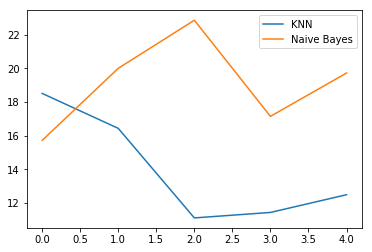

In [413]:
print("Plot for Ionsphere dataset of Naive Bayes vs KNN")
print("Yellow color line indicates Naive Bayes which is labelled as 1")
print("Blue color line indicates KNN which is labelled as 0")
print("X-Axis indicates K-Folds")
print("Y-Axis indicates Error in percentage")
plot_df = pd.DataFrame()
plot_df[0] = error_ion_KNN
plot_df[1] = error_ion_nb
plot_df.columns=['KNN','Naive Bayes']
plot_df.plot()


Plot for CarCredit dataset of Naive Bayes vs KNN
Yellow color line indicates Naive Bayes which is labelled as 1
Blue color line indicates KNN which is labelled as 0
X-Axis indicates K-Folds
Y-Axis indicates Error in percentage


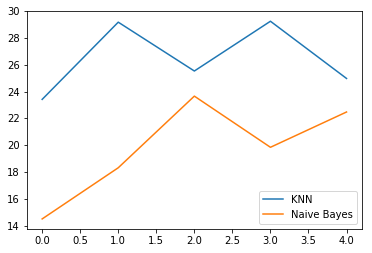

In [415]:
print("Plot for CarCredit dataset of Naive Bayes vs KNN")
print("Yellow color line indicates Naive Bayes which is labelled as 1")
print("Blue color line indicates KNN which is labelled as 0")
print("X-Axis indicates K-Folds")
print("Y-Axis indicates Error in percentage")
plot_df = pd.DataFrame()
plot_df[0] = error_credit_KNN
plot_df[1] = error_credit_nb
plot_df.columns=['KNN','Naive Bayes']
plot_df.plot()

Plot for Car dataset of Naive Bayes vs KNN
Yellow color line indicates Naive Bayes which is labelled as 1
Blue color line indicates KNN which is labelled as 0
X-Axis indicates K-Folds
Y-Axis indicates Error in percentage


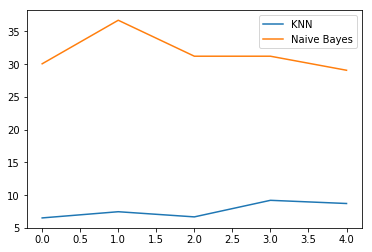

In [414]:
print("Plot for Car dataset of Naive Bayes vs KNN")
print("Yellow color line indicates Naive Bayes which is labelled as 1")
print("Blue color line indicates KNN which is labelled as 0")
print("X-Axis indicates K-Folds")
print("Y-Axis indicates Error in percentage")
plot_df = pd.DataFrame()
plot_df[0] = error_car_KNN
plot_df[1] = error_car_nb
plot_df.columns=['KNN','Naive Bayes']
plot_df.plot()

# print(error_car_KNN)

## Problem 5: Support Vector Machines [20 points]

In this problem we are going to use the Iris dataset. This dataset has four features:

1.   sepal length
2.   sepal width
3.   petal length
4.   petal width

and three classes:

1.    Iris-Setosa
2.    Iris-Versicolour
3.    Iris-Virginica

In [300]:
from sklearn import svm, datasets

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [302]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target
# iris.target_names

In [303]:
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [304]:
# df.head()
# df['species'].unique()

In [305]:
# df.groupby('species').size()

5.1 Create two plots:

1.   One using the sepal length (x-axis) and sepal width (y-axis),
2.   One using the petal length (x-axis) and petal width (y-axis),



In [306]:
setosa=df[df['species']=='setosa']
versicolor =df[df['species']=='versicolor']
virginica =df[df['species']=='virginica']

In [307]:
# setosa.describe()
# versicolor.describe()
# virginica.describe()

In [399]:
#Referred from -https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation
#https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

<Figure size 432x288 with 0 Axes>

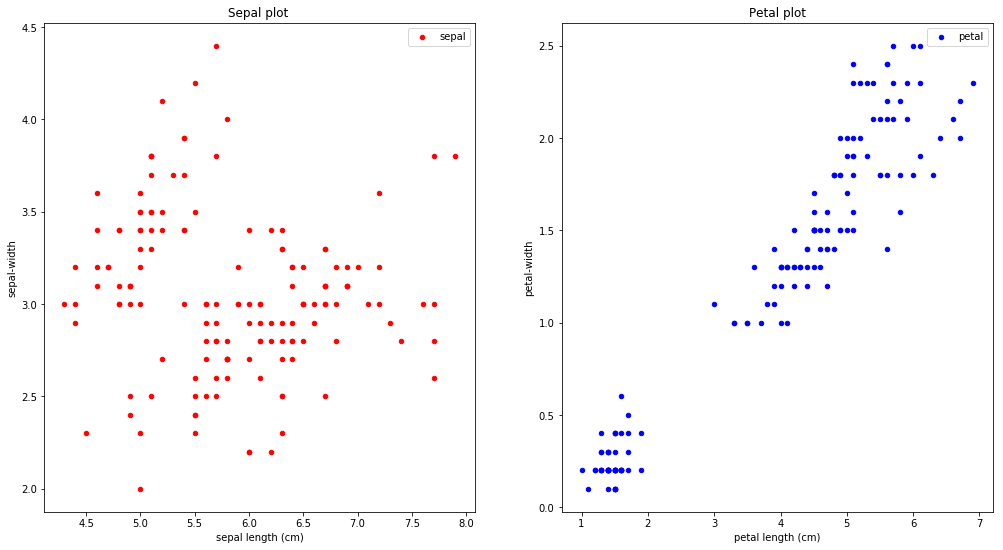

In [308]:
#Plotting Petal Length vs Petal Width & Sepal Length vs Sepal width
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
df.plot(x='sepal length (cm)',y='sepal width (cm)',kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
df.plot(x='petal length (cm)',y='petal width (cm)',kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal plot ', ylabel='sepal-width')
ax[1].set(title='Petal plot',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
# plt.show()
# plt.close()

# we can see that  there are some petals which are smaller than rest of petal.
#Let's examine them


5.2 Create a SVM with the following kernels and train it using the sepal features:


1.   SVC with linear kernel (use sklearn's svm.SVC with the kernel parameter 'linear'),
2.   LinearSVC (use sklearn's svm.LinearSVC),
3.   SVC with the RBF kernel,
4.   SVC with a polynomial kernel of degree 3

Plot the decision boundary for each of the four models. Hint: use matplotlib’s contourf and scatter functions. Be sure to label your axes.

In [309]:
# Code for problem 5.2 goes here
#Referenced from - https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
X = iris.data[:, :2]  # we only take the Sepal two features.
y = iris.target
C = 1.0 
h = .02 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [310]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [311]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

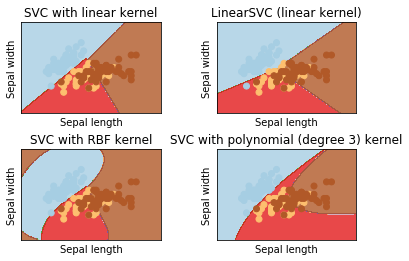

In [312]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

5.3 Repeat 5.2 using the petal features.

In [313]:
# Code for problem 5.3 goes here
X = iris.data[:, 2:4]  # we only take the Sepal two features.
y = iris.target
C = 1.0 
h = .02 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [314]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [315]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

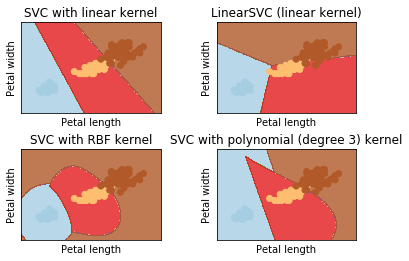

In [316]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()